# GEQIE QRCI Example

## Setup

### Imports

In [8]:
import numpy as np
from PIL import Image, ImageOps

import matplotlib.pyplot as plt

import geqie
from geqie.encodings import qrci

## Encoding

### Opening the image

In [9]:
image = Image.open("../../assets/test_images/rgb/rgb.png")
image = np.asarray(image)

In [10]:
print(image[:,:,0])
print(image[:,:,1])
print(image[:,:,2])

[[255   0]
 [  0 119]]
[[  0 127]
 [  0 119]]
[[  0   0]
 [ 85 119]]


### Encoding using unitary gate

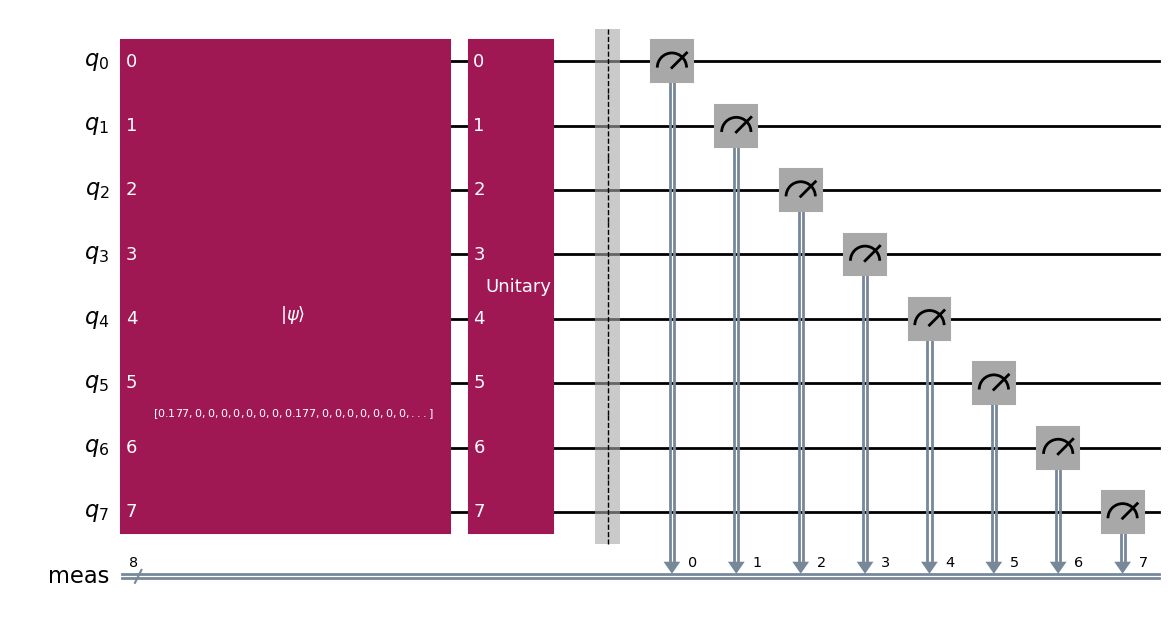

In [11]:
circuit = geqie.encode(qrci.init_function, qrci.data_function, qrci.map_function, image)
circuit.draw(output='mpl')

### Simulating the circuit

In [12]:
result = geqie.simulate(circuit, 1000)
result

{'10100000': 28,
 '11001111': 34,
 '10111001': 36,
 '10101001': 41,
 '11011111': 32,
 '00010100': 25,
 '01101010': 28,
 '00100100': 38,
 '00111100': 25,
 '01100010': 29,
 '11010111': 39,
 '01110010': 31,
 '10010000': 23,
 '11101111': 38,
 '00001100': 25,
 '10011001': 36,
 '10001001': 29,
 '00110100': 27,
 '00101100': 38,
 '01000000': 28,
 '01001010': 38,
 '11000000': 35,
 '11100000': 35,
 '11111111': 32,
 '00011100': 30,
 '01111010': 38,
 '01011010': 27,
 '11110111': 23,
 '10000000': 27,
 '01010010': 24,
 '10110000': 27,
 '00000100': 34}

## Interpretation of the results

Total state $\ket{\psi}$ is equal to:
$$\ket{\psi} = \ket{X\_ coordinates}^{log_2(x)}\otimes\ket{Y\_ coordinates}^{log_2(y)}\otimes\ket{LXY}^{\otimes 3}\otimes\ket{RGB\_channel}^{\otimes 3}$$
Where:
- $\ket{X\_ coordinates}^{log_2(x)}$ and $\ket{Y\_ coordinates}^{log_2(y)}$ corresponds to X and Y positions encodings respectively,
- Next 3 qubits are used to encode label mask of intensity for single channel, for example: $77 = \ket{0100\_1101}$ (corresponds to $2^6+2^3+2^2+2^0$),
- Last 3 qubits are used to encode $\ket{RGB}$ channel


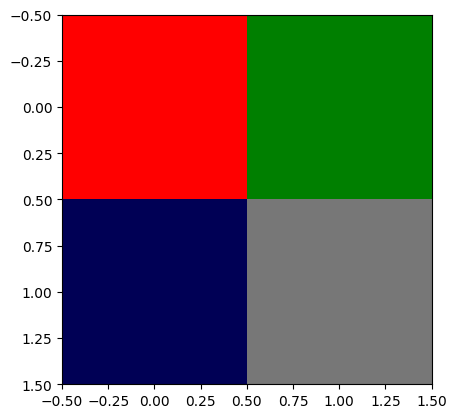

In [13]:
retrieved_image = qrci.retrieve_function(result)
plt.imshow(retrieved_image, cmap="gray")
plt.show()

### Reconstructed image

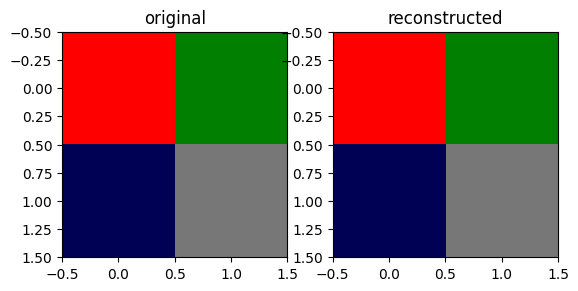

In [14]:
f = plt.figure()
gs = f.add_gridspec(1, 2)

ax = f.add_subplot(gs[0, 0])
ax.set_title("original")
ax.imshow(image)

ax = f.add_subplot(gs[0, 1])
ax.set_title("reconstructed")
ax.imshow(retrieved_image)